In [1]:
from array import array
import math
import numpy as np
import random



In [2]:
def generator_function(x,par):
    return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x+paramlist[2]*x*x

par = array('d')
par.append(0.4321)
par.append(1.6789)
par.append(0.50)
par.append(1.0000)

In [3]:

m = 2 #Set the order of the polynomial
n = 15 #Set the number of data points

In [4]:
x = array('d')
y = array('d')
ex = array('d')
ey = array('d')

In [5]:
for i in range(0,n):
    x.append(i+1)
    y.append(generator_function(x[i],par) + 10.0*random.gauss(0.0,1.0))
    ex.append(0.0)
    ey.append(5.0*math.sqrt(math.fabs(y[i])))

In [6]:
m_params = m + 1
a = np.zeros(shape = (m_params,m_params))
v = np.zeros(shape = (m_params,1))

In [7]:
for k in range(0,m_params):
    for i in range(0,n):
        v[k][0]=v[k][0]+y[i]*math.pow(x[i],k)/math.pow(ey[i],2)
    #print ("v[%d] = %f" % (k,v[k][0]))
    for j in range(0,m_params):
        for i in range(0,n):
            a[k][j]=a[k][j]+math.pow(x[i],k+j)/math.pow(ey[i],2)
        #print ("a[%d][%d] = %f" %(k,j,a[k][j]))
        
print ("Cofactor matrix:")
print (a)
print ("Constant matrix:")
print (v)

ainv = np.linalg.inv(a)
u1 = np.dot(a,ainv)

print ("Inverse matrix")
print (ainv)
print ("Diagonal Check:")
print (u1)
coeff = ainv*np.matrix(v)
print ("Coefficients:")
print (coeff)
        

Cofactor matrix:
[[0.0133992  0.02850454 0.09429351]
 [0.02850454 0.09429351 0.53015488]
 [0.09429351 0.53015488 4.46411672]]
Constant matrix:
[[ 0.6]
 [ 4.8]
 [49.6]]
Inverse matrix
[[ 540.97528503 -298.80216205   24.05872761]
 [-298.80216205  196.95581022  -17.07885019]
 [  24.05872761  -17.07885019    1.74409732]]
Diagonal Check:
[[ 1.00000000e+00 -1.54332877e-15  4.11814319e-17]
 [ 3.81094707e-15  1.00000000e+00  2.34325803e-16]
 [-7.08157901e-15 -3.91531085e-15  1.00000000e+00]]
Coefficients:
[[ 83.64768281]
 [-81.00437753]
 [ 18.96398285]]


In [8]:
yfit = 0
error_sum = 0
for j in range(0,n):
    for k in range(0,m+1):
        yfit = yfit + coeff[k]*math.pow(x[j],k)
    print ("i = %d  y = %f  yfit = %f" % (j,y[j],yfit))
    error_sum = error_sum + math.pow(((yfit-y[j])/ey[j]),2)
    yfit = 0
    
chi2 = error_sum/(n-m)
print ("chi2/dof = %f / %f" % (error_sum,(n-m-1)))

i = 0  y = 8.633957  yfit = 21.607288
i = 1  y = 6.301120  yfit = -2.505141
i = 2  y = 41.104325  yfit = 11.310396
i = 3  y = 62.556757  yfit = 63.053898
i = 4  y = 138.138785  yfit = 152.725366
i = 5  y = 244.990486  yfit = 280.324800
i = 6  y = 391.451650  yfit = 445.852200
i = 7  y = 579.156102  yfit = 649.307565
i = 8  y = 786.515574  yfit = 890.690896
i = 9  y = 1069.057964  yfit = 1170.002193
i = 10  y = 1409.890164  yfit = 1487.241455
i = 11  y = 1802.200322  yfit = 1842.408683
i = 12  y = 2302.888957  yfit = 2235.503877
i = 13  y = 2853.739415  yfit = 2666.527036
i = 14  y = 3512.110930  yfit = 3135.478162
chi2/dof = 6.368313 / 12.000000


/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_82030/2015070024.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ("i = %d  y = %f  yfit = %f" % (j,y[j],yfit))
/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_82030/2015070024.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  error_sum = error_sum + math.pow(((yfit-y[j])/ey[j]),2)


In [9]:
print ("Coefficients with Errors:")
for k in range(0,m+1):
    print("p%d = %f +/- %f" % (k,coeff[k],math.pow(ainv[k][k],0.5)))

Coefficients with Errors:
p0 = 83.647683 +/- 23.258875
p1 = -81.004378 +/- 14.034095
p2 = 18.963983 +/- 1.320643


/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_82030/3746815851.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("p%d = %f +/- %f" % (k,coeff[k],math.pow(ainv[k][k],0.5)))


[ 83.64768298 -81.00437774  18.96398288] [[ 540.97528826 -298.80216429   24.05872768]
 [-298.80216429  196.95581186  -17.07885025]
 [  24.05872768  -17.07885025    1.74409732]]
Coefficients (from curve_fit)
[ 83.64768298 -81.00437774  18.96398288]
Covariance Matrix (from curve_fit)
[[ 540.97528826 -298.80216429   24.05872768]
 [-298.80216429  196.95581186  -17.07885025]
 [  24.05872768  -17.07885025    1.74409732]]
Chi^2 / dof = 6.368E+00 / 12
Fit Parameter 0: 8.365E+01 +/- 2.326E+01
0 1 -9.154E-01
0 2 7.832E-01
Fit Parameter 1: -8.100E+01 +/- 1.403E+01
1 2 -9.215E-01
Fit Parameter 2: 1.896E+01 +/- 1.321E+00


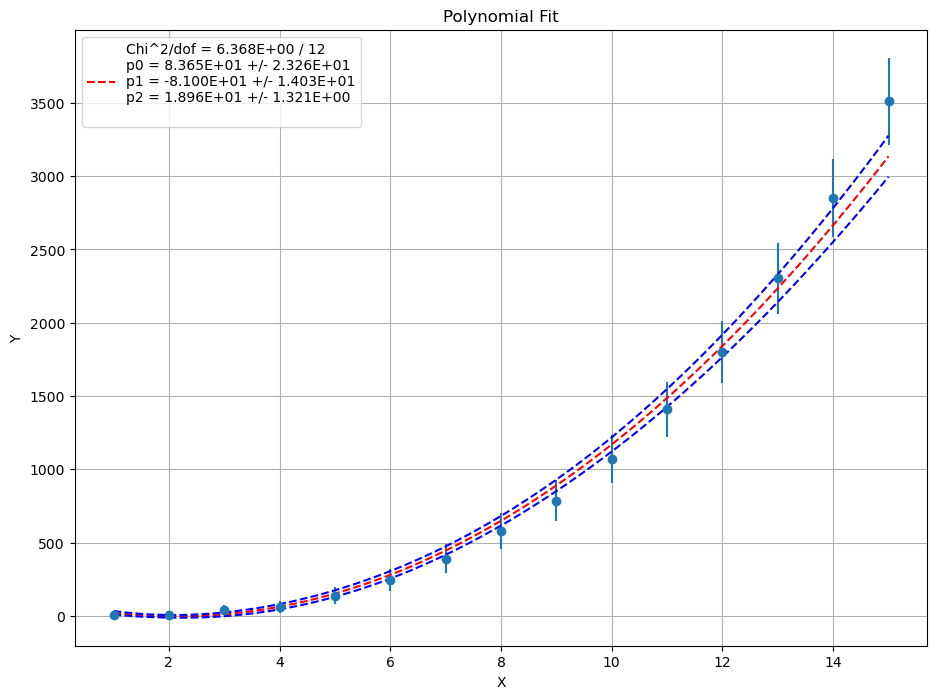

In [10]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x = np.array(x)
y = np.array(y)
ex = np.array(ex)
ey = np.array(ey)

fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.set_title("Polynomial Fit")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_yscale("linear")
ax1.grid(True)

ax1.errorbar(x,y,yerr=ey,fmt='o')

init_vals = [0.0 for x in range(0,m_params)]
#popt, pcov = curve_fit(fitfunction,x,y,sigma=ey,p0=init_vals)
popt, pcov = curve_fit(fitfunction,x,y,sigma=ey,p0=init_vals,absolute_sigma=True)

print (popt,pcov)

xi = np.linspace(np.min(x),np.max(x),100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

yfit = []
chi2=0
for i in range (0,n):
    yfit.append(fitfunction(x[i],*popt))
    #chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])
    chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])/(ey[i]*ey[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,n-len(init_vals)))

param = []
rhom = []
param.append(float(chi2))
param.append(n-len(init_vals))
for ii in range(0,len(init_vals)):
    param.append(float(popt[ii]))
    param.append(float(np.sqrt(pcov[ii][ii])))
    print("Fit Parameter %d: %.3E +/- %.3E" % (ii,popt[ii],np.sqrt(pcov[ii][ii])))
    for jj in range(0,len(init_vals)):
        rhom.append(float(pcov[ii][jj])/pow(float(pcov[ii][ii]*pcov[jj][jj]),0.5))
        if jj > ii:
            print("%d %d %.3E" % (ii,jj,rhom[ii*len(init_vals)+jj]))

mylabel = "Chi^2/dof = %.3E / %d\n"
for i in range(0,len(init_vals)):
    code = "p" + str(i)
    mylabel = mylabel + code + " = %.3E +/- %.3E\n"

ax1.plot(xi, fitfunction(xi, *popt), 'r--', label = mylabel % tuple(param))
ax1.plot(xi,lower,'b--')
ax1.plot(xi,upper,'b--')

leg = ax1.legend()
plt.show()

In [11]:
root_defined = False

if root_defined:
    from ROOT import TCanvas, TFile
    from ROOT import TGraph, TF1, TGraphErrors
    from ROOT import gStyle
    c1 = TCanvas( 'c1', 'Fitting Example with Errors', 200, 10, 700, 500 )
    c1.SetGridx()
    c1.SetGridy()
    c1.GetFrame().SetFillColor( 21 )
    c1.GetFrame().SetBorderMode(-1 )
    c1.GetFrame().SetBorderSize( 5 )

    poltype = "pol"+str(m)
    print (poltype)
    gr = TGraphErrors(n,x,y,ex,ey)
    pfit1 = TF1("pfit1",poltype)
    gr.SetMarkerStyle(21)
    gr.SetTitle("Cubic Fit")
    gr.GetXaxis().SetTitle("X")
    gr.GetYaxis().SetTitle("Y")
    gr.Fit("pfit1","q")
    pfit1chi2 = pfit1.GetChisquare()
    pfit1ndf = pfit1.GetNDF()
    pfit1chi2ndf = pfit1chi2/pfit1ndf
    print("Fit 1: %f %f \n" % (pfit1chi2,pfit1ndf))
    gr.Draw("AP")
    gStyle.SetOptFit(1)
    c1.Draw()